In [1]:
from igraph import *
import json
import random
import numpy as np
from numpy import linalg 
import itertools
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay  # needed for triangulation
import os
import pandas as pd
from copy import deepcopy

C:\Users\yaman\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yaman\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\yaman\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
random.seed(2022)
np.random.seed(2022)

In [3]:
with open('los_angeles_censustracts.json') as f:
    census_tracts = json.loads(f.readline())

In [4]:
display_names = dict()
coordinates = dict()

for area in census_tracts['features']:
    id = int(area['properties']['MOVEMENT_ID'])
    display_name = area['properties']['DISPLAY_NAME']
    display_names[id] = display_name
    a = area['geometry']['coordinates'][0]
    coordinates[id] = np.array(a if type(a[0][0]) == float else a[0]).mean(axis=0)

In [5]:
g = Graph(directed=False)
g.add_vertices(len(display_names))
g.vs['display_name'] = list(display_names.values())  # index = id - 1
g.vs['coordinates'] = list(coordinates.values())

In [6]:
g_month = {}

In [7]:
month_filter = {1}

edges = []
weights = []

with open('los_angeles-censustracts-2020-1-All-MonthlyAggregate.csv') as f:
    f.readline()  # skip the first line
    
    while True:
        line = f.readline()
        if line == '':
            break  # end of file
        
        vals = line.strip().split(',')
        
        # read edge info
        src, dest, month, dist = int(vals[0]), int(vals[1]), int(vals[2]), float(vals[3])

        # if data is not relevant, skip it
        if month not in month_filter:
            continue
            
        edges.append((src - 1, dest - 1))
        weights.append(dist)  

In [8]:
g.add_edges(edges)
g.es['weight'] = weights
del edges, weights

In [9]:
print(len(g.vs), len(g.es))

2716 1564592


In [10]:
g_month['Jan'] = g

In [11]:
g = Graph(directed=False)
g.add_vertices(len(display_names))
g.vs['display_name'] = list(display_names.values())  # index = id - 1
g.vs['coordinates'] = list(coordinates.values())

month_filter = {2}

edges = []
weights = []

with open('los_angeles-censustracts-2020-1-All-MonthlyAggregate.csv') as f:
    f.readline()  # skip the first line
    
    while True:
        line = f.readline()
        if line == '':
            break  # end of file
        
        vals = line.strip().split(',')
        
        # read edge info
        src, dest, month, dist = int(vals[0]), int(vals[1]), int(vals[2]), float(vals[3])

        # if data is not relevant, skip it
        if month not in month_filter:
            continue
            
        edges.append((src - 1, dest - 1))
        weights.append(dist)  
        
g.add_edges(edges)
g.es['weight'] = weights
del edges, weights

print(len(g.vs), len(g.es))

2716 1565839


In [12]:
g_month['Feb'] = g

In [13]:
g = Graph(directed=False)
g.add_vertices(len(display_names))
g.vs['display_name'] = list(display_names.values())  # index = id - 1
g.vs['coordinates'] = list(coordinates.values())

month_filter = {3}

edges = []
weights = []

with open('los_angeles-censustracts-2020-1-All-MonthlyAggregate.csv') as f:
    f.readline()  # skip the first line
    
    while True:
        line = f.readline()
        if line == '':
            break  # end of file
        
        vals = line.strip().split(',')
        
        # read edge info
        src, dest, month, dist = int(vals[0]), int(vals[1]), int(vals[2]), float(vals[3])

        # if data is not relevant, skip it
        if month not in month_filter:
            continue
            
        edges.append((src - 1, dest - 1))
        weights.append(dist)  
        
g.add_edges(edges)
g.es['weight'] = weights
del edges, weights

print(len(g.vs), len(g.es))

2716 1247442


In [14]:
g_month['Mar'] = g

In [15]:
print(g_month)

{'Jan': <igraph.Graph object at 0x000002AFAD413B40>, 'Feb': <igraph.Graph object at 0x000002AFAD413740>, 'Mar': <igraph.Graph object at 0x000002AFAD413840>}


Text(0.5, 1.0, 'Number of trips each month in 2020')

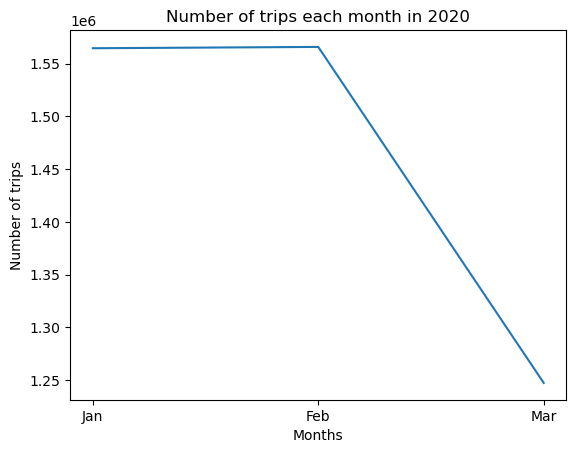

In [16]:
plt.plot(['Jan', 'Feb', 'Mar'], [len(g_month['Jan'].es()), len(g_month['Feb'].es()), len(g_month['Mar'].es())])
plt.xlabel('Months')
plt.ylabel('Number of trips')
plt.title('Number of trips each month in 2020')

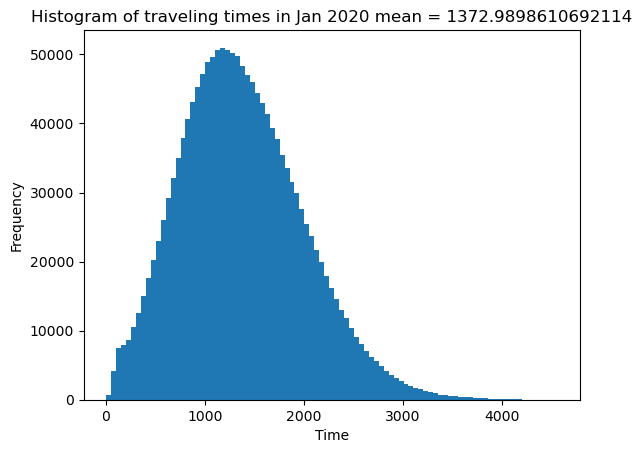

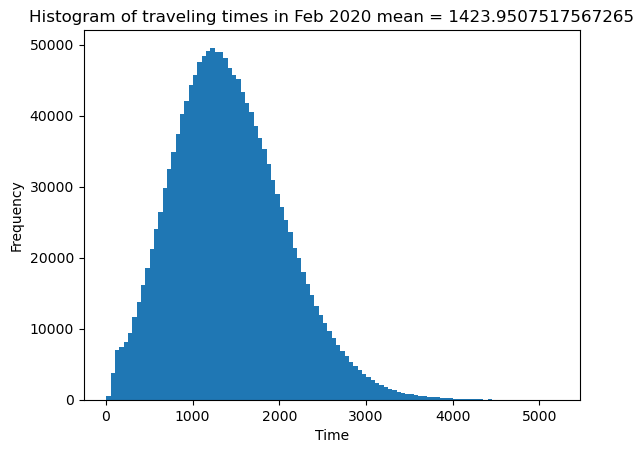

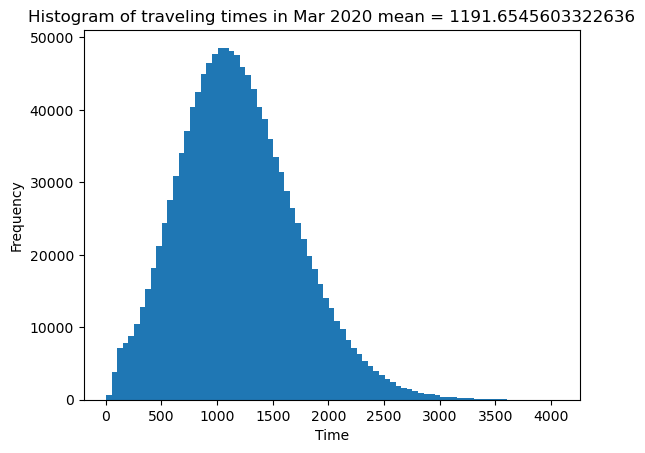

In [17]:
for key in g_month.keys():
    weights = g_month[key].es['weight']
    binwidth = 50
    bins = np.arange(min(weights), max(weights) + binwidth, binwidth)
    plt.hist(weights, bins=bins)
    mean = np.mean(weights)
    plt.title('Histogram of traveling times in '+ key +' 2020 mean = ' + str(mean) +'')
    plt.ylabel('Frequency')
    plt.xlabel('Time')
    plt.show()

In [18]:
for key in g_month.keys():
    for e in g_month[key].es:
        v1 = g_month[key].vs[e.source]['coordinates']
        v2 = g_month[key].vs[e.target]['coordinates'] 
        dist = linalg.norm(v1 - v2)* 69
        time = e['weight']/3600
        speed = dist/time
        e['speed'] = speed
    print(key)
    

Jan
Feb
Mar


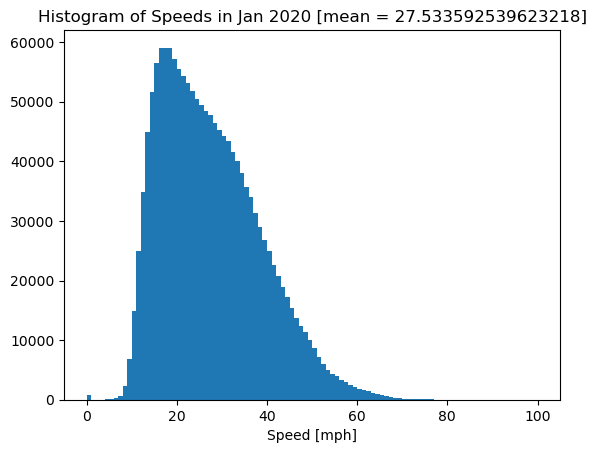

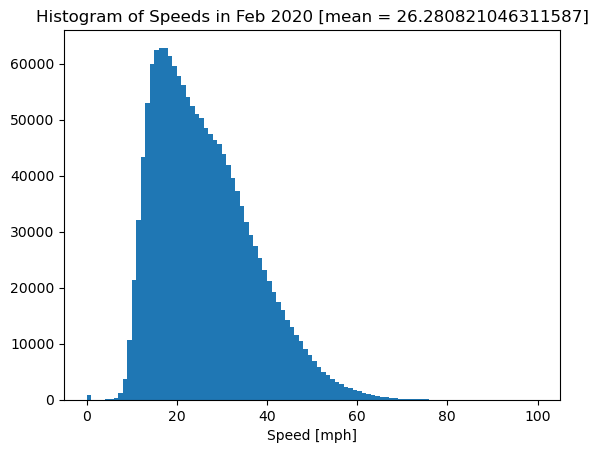

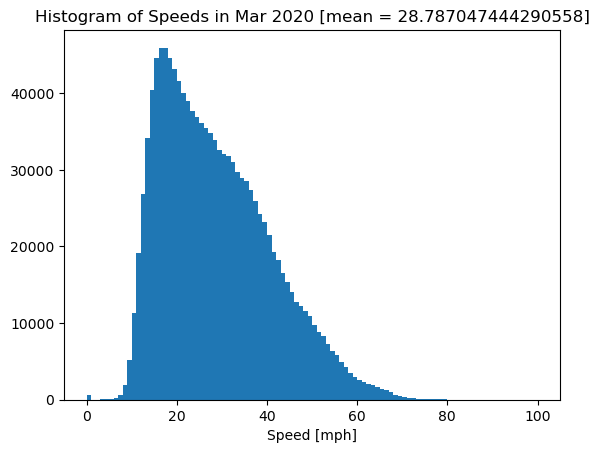

In [19]:
for key in g_month.keys():
    speeds = g_month[key].es['speed']
    binwidth = 1
    bins = np.arange(min(speeds), 100 + binwidth, binwidth)
    plt.hist(speeds, bins=bins)
    mean = np.mean(speeds)
    plt.title('Histogram of Speeds in '+ key +' 2020 [mean = ' + str(mean) +']')
    plt.xlabel('Speed [mph]')
    plt.show()

In [20]:
dict_coordinates = {}
for key in g_month.keys():
    pr = g_month[key].pagerank()
    idx = np.argsort(pr)[::-1]
    coord_list = []
    for i in range(5):
        coordinates = g_month[key].vs[idx[i]]['coordinates'][::-1]
        coord_list.append(coordinates)
        print(i+1, coordinates)
    dict_coordinates[key] = coordinates

1 [  33.94087088 -118.42336888]
2 [  33.93421103 -118.36347711]
3 [  33.92776102 -118.36585774]
4 [  33.931878   -118.28427826]
5 [  33.91599813 -118.38430965]
1 [  33.94087088 -118.42336888]
2 [  33.93421103 -118.36347711]
3 [  33.92776102 -118.36585774]
4 [  33.931878   -118.28427826]
5 [  34.03412762 -118.23218029]
1 [  33.94087088 -118.42336888]
2 [  33.93421103 -118.36347711]
3 [  33.931878   -118.28427826]
4 [  33.92776102 -118.36585774]
5 [  34.03138969 -118.22114822]


In [21]:
# Finding places near to UCLA.
#34.0699° N, 118.4438
g = g_month["Jan"]
all_coordinates = np.array(g.vs['coordinates'])
tri = Delaunay(all_coordinates)

In [22]:
duplicates = set()
edges_to_induce = []
for idx in range(len(tri.simplices)):
    for col1, col2 in ((0,1),(1,2),(0,2)):
        p = tuple(tri.simplices[idx][[col1,col2]])
        list_p = tuple(np.sort(p)) 
        v1  = list_p[0]
        v2  = list_p[1]
        if not list_p in duplicates and g.get_eid(v1,v2,directed = False,error = False) != -1 :    
            duplicates.add(list_p)
            edges_to_induce.append(list_p)

In [23]:
tri_g = g.subgraph_edges(edges_to_induce)

In [24]:
ucla_coordinates = [-118.4438,34.0699]

In [25]:
ucla_idx= np.argmin(np.sum((tri_g.vs["coordinates"] - np.array(ucla_coordinates))**2,axis = 1))

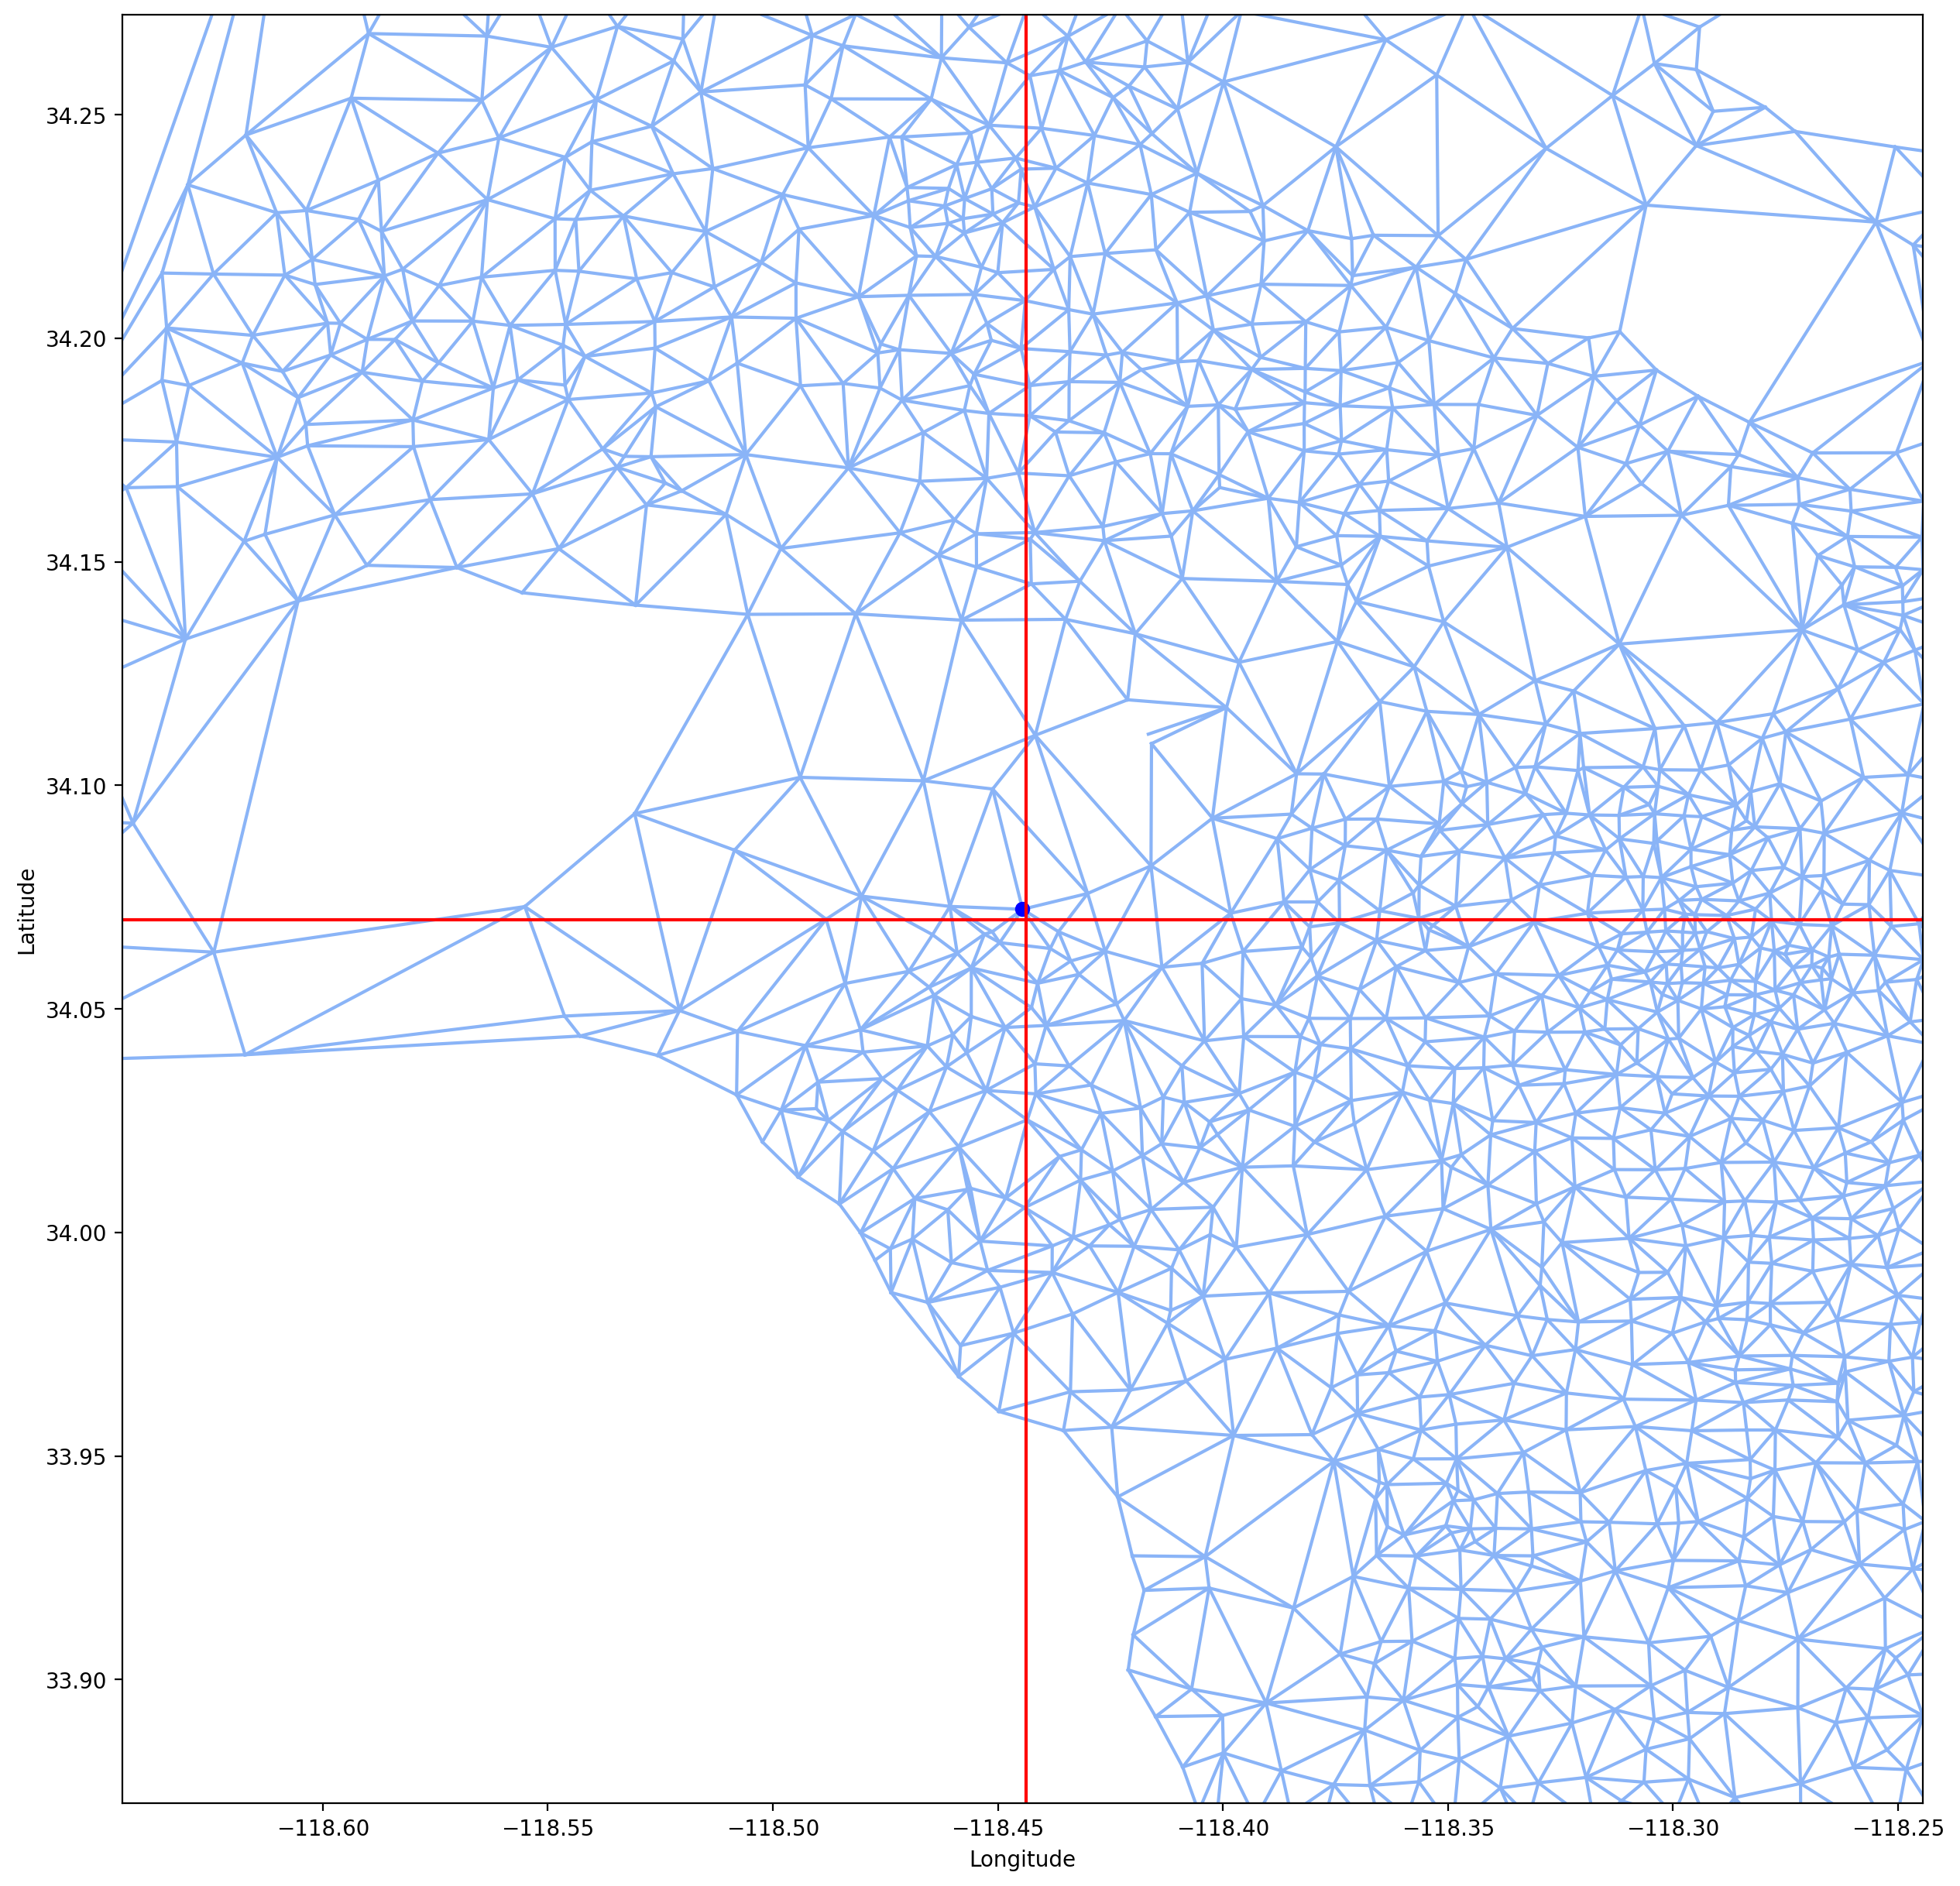

In [26]:
p_ofset = 0.2
plt.figure(figsize=(15,15), dpi=200)
for e in tri_g.es:
    v1 = tri_g.vs[e.source]['coordinates']
    v2 = tri_g.vs[e.target]['coordinates']
    data = np.vstack([v1, v2])
    x = data[:, 0]
    y = data[:, 1]
    plt.plot(x, y,'#8ab4f7')
v1_coord = tri_g.vs[ucla_idx]['coordinates']
x,y = v1_coord[0],v1_coord[1]
plt.plot(x, y, 'bo')
plt.xlim(x-p_ofset,x+p_ofset)
plt.ylim(y-p_ofset,y+p_ofset)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.axvline(x = ucla_coordinates[0], color = 'r', linestyle = '-')
plt.axhline(y = ucla_coordinates[1], color = 'r', linestyle = '-')
plt.show()

In [27]:
commutes = [10*60,30*60,60*60,90*60]

In [28]:
v_ucla = tri_g.vs[ucla_idx]

data1 = np.array([])
data2 = np.array([])
data3 = np.array([])
data4 = np.array([])

for v in tri_g.vs:
    if v != v_ucla:
        results = tri_g.get_shortest_paths(v, to=v_ucla,weights = tri_g.es['weight'],output="vpath")
        if len(results[0]) > 0:
            time = 0
            for e in results[0]:
                time += tri_g.es[e]["weight"]
            if (time < commutes[0]):
                if(data1.shape[0] == 0):
                    data1 = v['coordinates']
                else:
                    data1 = np.vstack([data1,v['coordinates']])
            elif (time < commutes[1]):
                if(data2.shape[0] == 0):
                    data2 = v['coordinates']
                else:
                    data2 = np.vstack([data2,v['coordinates']])
            elif (time < commutes[2]):
                if(data3.shape[0] == 0):
                    data3 = v['coordinates']
                else:
                    data3 = np.vstack([data3,v['coordinates']])
            elif (time < commutes[3]):
                if(data4.shape[0] == 0):
                    data4 = v['coordinates']
                else:
                    data4 = np.vstack([data4,v['coordinates']])
    

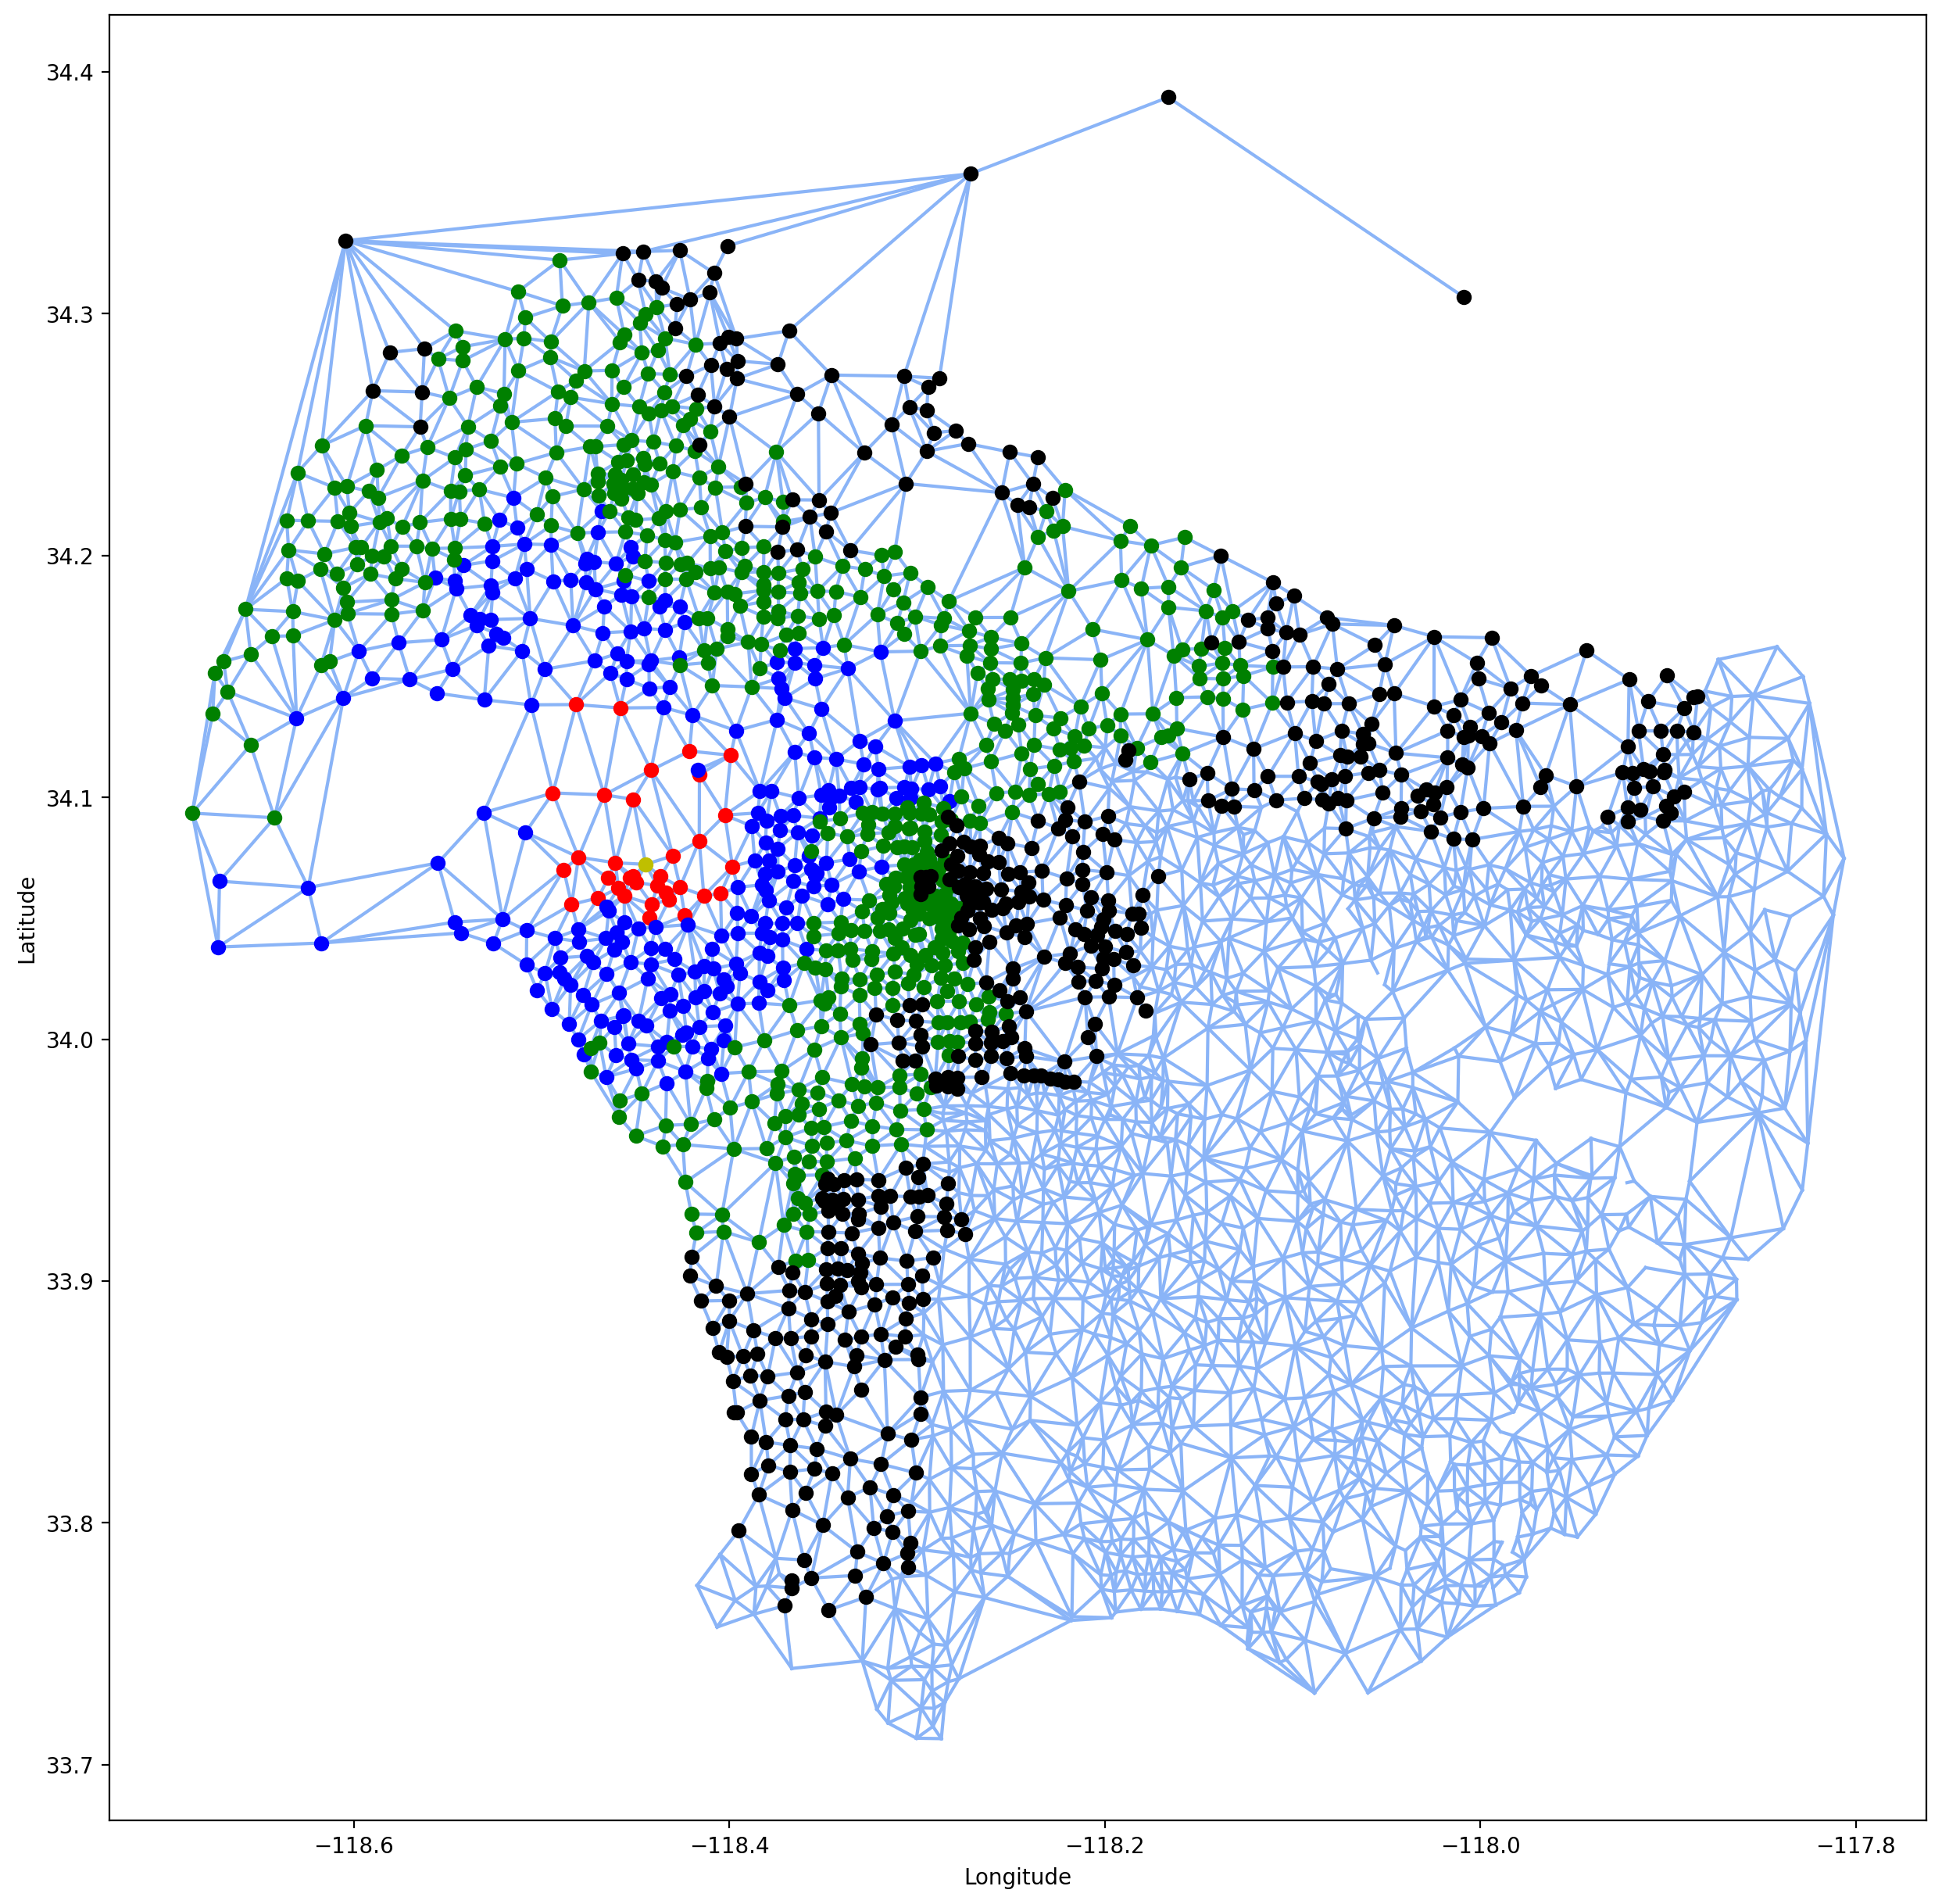

In [29]:
p_ofset = 0.2
plt.figure(figsize=(15,15), dpi=200)
for e in tri_g.es:
    v1 = tri_g.vs[e.source]['coordinates']
    v2 = tri_g.vs[e.target]['coordinates']
    data_e = np.vstack([v1, v2])
    x = data_e[:, 0]
    y = data_e[:, 1]
    plt.plot(x, y,'#8ab4f7')
    
x = data1[:, 0]
y = data1[:, 1]
plt.plot(x, y, 'ro')
x = data2[:, 0]
y = data2[:, 1]
plt.plot(x, y, 'bo')
x = data3[:, 0]
y = data3[:, 1]
plt.plot(x, y, 'go')
x = data4[:, 0]
y = data4[:, 1]
plt.plot(x, y, 'ko')

v1_coord = tri_g.vs[ucla_idx]['coordinates']
x,y = v1_coord[0],v1_coord[1]
plt.plot(x, y, 'yo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()